# Sub-metric 2: Infrastructure Part 2 - Haiwei

As described previously, the second sub-metric we chose to analyse is infrastructure, as it is an important consideration for those who regularly walk dogs. I looked at the sidewalk to street "walkability" ratio.

In [13]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

Let's import the neighborhood data and inspect it.

In [14]:
pgh = geopandas.read_file("Neighborhoods_.shp")
pgh.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


Plotting the neighborhoods:

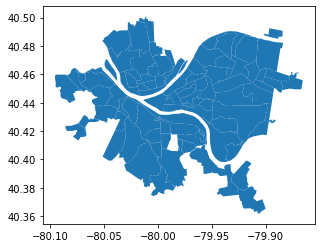

In [15]:
pgh.plot()

Now we read in the csv file containing walkability ratios:

In [16]:
walkability = geopandas.read_file('sidewalkstreetratioupload.csv') # read in the csv file
walkability = walkability.rename(index=str, columns={"SidewalkStepLFt":"Sidewalk Length",
                                                     "StreetLFt":"Street Length",}) # renaming column titles for readability
walkability = walkability.drop('geometry', axis=1) # remove unnecessary column
walkability.head()

,GEOID,NAMELSAD,Sidewalk Length,Street Length,Ratio
0,420030103001,Block Group 1,13392.8331,30315.8639,0.441776396
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697391
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538865732
3,420030103004,Block Group 4,14456.19616,11567.62831,1.24971133
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394258


Let's prepare the data for plotting.

In [17]:
walkabilityMap = pgh.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
walkabilityMap.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,GEOID,NAMELSAD,Sidewalk Length,Street Length,Ratio
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",420031405003,Block Group 3,14314.35819,6171.791993,2.319319609
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",420031401003,Block Group 3,23168.94754,6408.606643,3.615286259
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",420031017002,Block Group 2,18962.43415,8163.046727,2.322960383
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",420030509001,Block Group 1,34060.43485,5125.794855,6.644907924
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",420033001005,Block Group 5,12063.35028,7293.079868,1.654081745


Text(0.1, 0.08, 'Source: WPRDC, 2021')

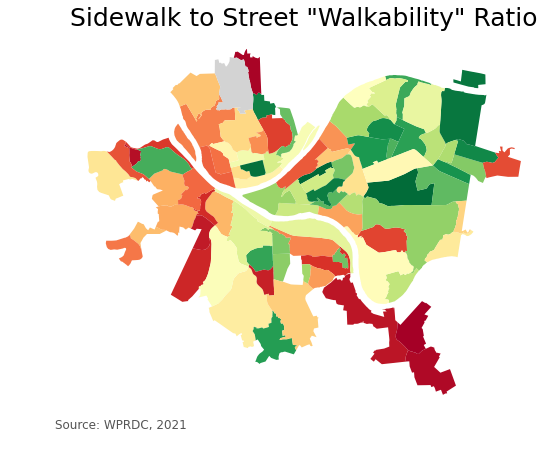

In [18]:
wm = walkabilityMap.plot(column = 'Ratio', 
                         cmap = 'RdYlGn',
                         figsize = (10,7), 
                         missing_kwds = {'color': 'lightgrey'},
                         # legend = True,
                         )
wm.set_axis_off()
wm.set_title('Sidewalk to Street "Walkability" Ratio', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})
wm.annotate('Source: WPRDC, 2021',xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

<ipython-input-19-8588691ce4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Ratio'] = bar_data['Ratio'].astype(float)


Text(0, 0.5, 'Neighborhood')

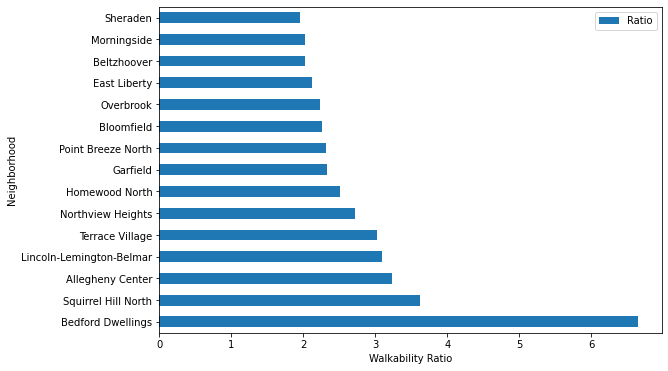

In [19]:
bar_data = walkabilityMap[['Ratio', 'hood']]
bar_data['Ratio'] = bar_data['Ratio'].astype(float)
bar_data_sorted = bar_data.sort_values('Ratio', ascending=False).head(15)
ratio_bar = bar_data_sorted.plot(y='Ratio', x='hood', kind='barh',figsize = (9,6))
plt.xlabel("Walkability Ratio")
plt.ylabel("Neighborhood")

# Sub-metric 3: Infrastructure Part 2 - Haiwei


Though I have never owned a dog, I wouuld imagine that having open green space would be beneficial to dog health. Thus, I chose to analyse the number of parks per neighborhood.

As we have already read in the neighborhood data, let's import the parks data set.

In [20]:
parks = geopandas.read_file('park.csv') # read in the csv file
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,geometry
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.4081182,-80.02819656,None
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.44050716,-79.98401757,None
2,1544096765,Alcoa Park,Park,Parks - Northern,,North Shore,1,22,42003563200,6,22,1,1-20,40.44748073,-80.00101726,None
3,1212681573,Allegheny Commons,Park,Parks - Northern,,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.4531264,-80.00915763,None
4,954863286,Allegheny Landing Park,Park,Parks - Northern,,North Shore,1,22,42003563200,6,22,1,1-20,40.44718412,-80.0029073,None


The data includes entries for traffic islands and building grounds, which aren't useful for most dog owners. Let's eliminate any entry that is not a park and calculate the number of parks within each tract.

In [21]:
parks = parks.drop(parks[parks['type'] != 'Park'].index) # remove non-park entries
parkSum = pd.DataFrame((parks['neighborhood'].value_counts()[x] for x in parks['neighborhood']),parks['neighborhood'])
parkSum.columns = {'Number of Parks'} # rename column
parkSum = parkSum[~parkSum.index.duplicated(keep='first')] # remove duplicates
parkSum.head()

,Number of Parks
neighborhood,
Beechview,6
Crawford-Roberts,3
North Shore,3
Allegheny Center,2
Central Business District,3


Let's merge the park dataframe with the neighborhood shape data.

In [35]:
parksMap = pgh.merge(parkSum, how='left', left_on='hood', right_on='neighborhood') 
parksMap.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,Number of Parks
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",1.0
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",1.0
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",3.0
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",1.0
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",NaN


Text(0.1, 0.08, 'Source: WPRDC, 2021')

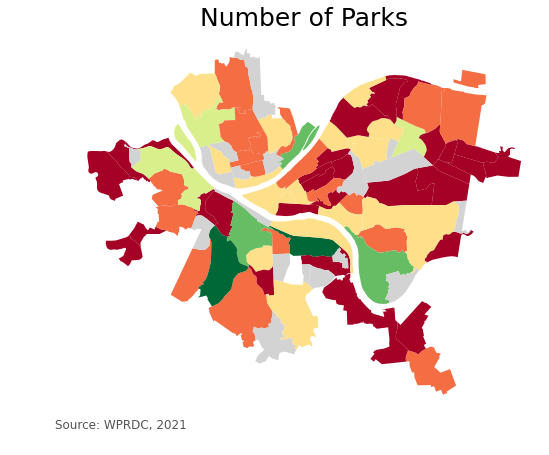

In [36]:
pm = parksMap.plot(column = 'Number of Parks', 
                         cmap = 'RdYlGn',
                         figsize = (10,7), 
                         missing_kwds = {'color': 'lightgrey'},
                         # legend = True,
                         )
pm.set_axis_off()
pm.set_title('Number of Parks', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})
pm.annotate('Source: WPRDC, 2021',xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

<ipython-input-37-cb908e7ef01b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Number of Parks'] = bar_data['Number of Parks'].astype(float)


Text(0, 0.5, 'Neighborhood')

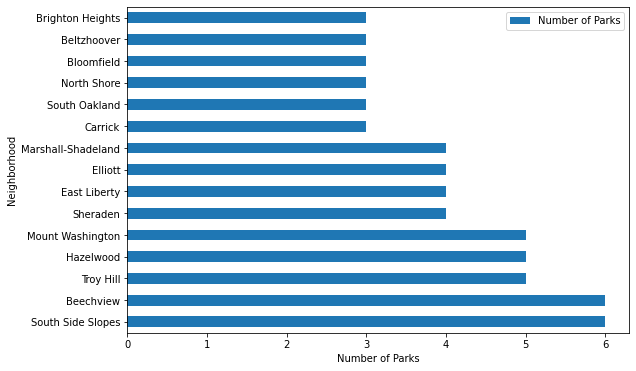

In [37]:
bar_data = parksMap[['Number of Parks', 'hood']]
bar_data['Number of Parks'] = bar_data['Number of Parks'].astype(float)
bar_data_sorted = bar_data.sort_values('Number of Parks', ascending=False).head(15)
ratio_bar = bar_data_sorted.plot(y='Number of Parks', x='hood', kind='barh',figsize = (9,6))
plt.xlabel("Number of Parks")
plt.ylabel("Neighborhood")